# Example III: Mass-imbalanced fermions in a flat box

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Energies

Benchmark energies digitized from Fig. 2 of [this paper](https://doi.org/10.1103/PhysRevA.94.042118).

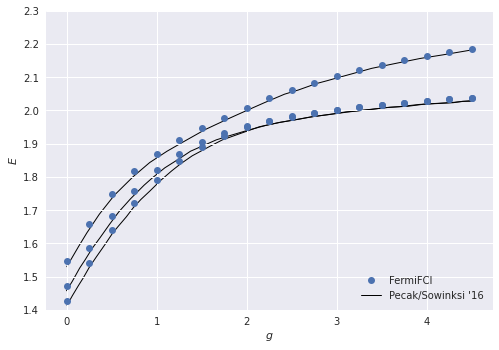

In [8]:
from scipy.interpolate import interp1d

nb = 14
coupling = 4.0
n_up, n_down = 1, 3

data = pd.read_csv("exIII_data.csv")
subset = data[(data['N']<=3) & (data['coupling']<=4.5)].sort_values(by="coupling")


with plt.style.context("seaborn"):
    fig, ax = plt.subplots()
    
    # Energy.
    ax.plot(subset["coupling"], subset["energy"], marker='o', ls='', label='FermiFCI')

    # Benchmark section.
    sow = pd.read_csv('sowinski_1+3_mib_ENERGIES.csv')
    for N in range(3):
        sub = sow[sow['n']==N+1].sort_values(by='g')
        ax.plot(sub['g'], sub['energy'], marker='', color='black', ls='-', lw=1, zorder=0, label='' if N else 'Pecak/Sowinksi \'16')

    # ---

    ax.set_xlabel('$g$')
    ax.set_ylabel('$E$')
    ax.legend(loc='lower right')
    ax.set_ylim(1.4, 2.3)

## Density profiles

Benchmark density profiles digitized from Fig. 3 of [this paper](https://doi.org/10.1103/PhysRevA.94.042118).

In [2]:
def normalize_density(x, y):
    """ Normalizes the density to one.
    """
    return y/(np.sum(y)*(x[1]-x[0]))

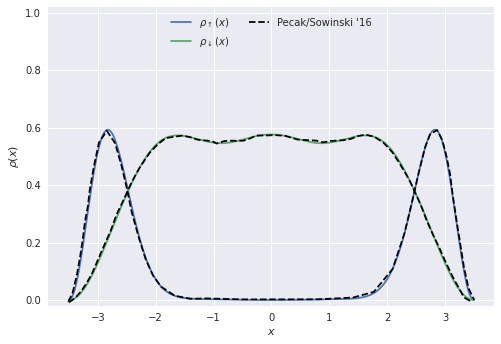

In [10]:
nb = 14
coupling = 4.0
n_up, n_down = 1, 3


with plt.style.context("seaborn"):
    fig, ax = plt.subplots()
    
    # Density.
    data_up = pd.read_csv("flat_density_up_g={:.1f}.csv".format(coupling))
    x = data_up['x']
    density_up = normalize_density(x, data_up['density'])*n_up

    data_down = pd.read_csv("flat_density_down_g={:.1f}.csv".format(coupling))
    density_down = normalize_density(x, data_down['density'])*n_down

    ax.plot(x, density_up,  ls='-', marker='', label='$\\rho_{\\uparrow}(x)$')
    ax.plot(x, density_down,  ls='-', marker='', label='$\\rho_{\\downarrow}(x)$')

    # ---
    
    # Benchmark.
    sow_density = pd.read_csv('sowinski_1+3_nb=14_mib_DENSITY.csv')
    for k, f in enumerate(['up', 'down']):
        sub = sow_density[sow_density['flavor']==f]
        ax.plot(sub['x'], sub['rho'], color='black', ls='--', marker='', label='Pecak/Sowinski \'16' if k else '')


    # ---
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\\rho(x)$')
    ax.set_ylim(-0.02, 1.02)
    ax.legend(loc='upper center', ncol=2)